In [133]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [134]:
# Ścieżki do folderów
max_pooling_path = 'MaxPooling2D_v2'
double_max_pooling_path = 'Double_MaxPooling2D_v2'
dense_path = 'Dense'
conv_path = 'Conv2D'

# Wczytanie plików history.csv do obiektów
max_pooling_histories = {}
double_max_pooling_histories = {}
dense_histories = {}
conv_histories = {}

DATA_SIZE = 30

In [135]:
# Funkcja do wczytywania pliku history.csv
def load_history(file_path):
    df = pd.read_csv(file_path)
    return df

# Wczytywanie plików history.csv dla MaxPooling2D
for folder_name in os.listdir(max_pooling_path):
    folder_path = os.path.join(max_pooling_path, folder_name)
    if os.path.isdir(folder_path):
        csv_path = os.path.join(folder_path, 'history.csv')
        if os.path.isfile(csv_path):
            history = load_history(csv_path)
            max_pooling_histories[folder_name] = history

# Wczytywanie plików history.csv dla DoubleMaxPooling2D
for folder_name in os.listdir(double_max_pooling_path):
    folder_path = os.path.join(double_max_pooling_path, folder_name)
    if os.path.isdir(folder_path):
        csv_path = os.path.join(folder_path, 'history.csv')
        if os.path.isfile(csv_path):
            history = load_history(csv_path)
            double_max_pooling_histories[folder_name] = history

# Wczytywanie plików history.csv dla Dense
for folder_name in os.listdir(dense_path):
    folder_path = os.path.join(dense_path, folder_name)
    if os.path.isdir(folder_path):
        csv_path = os.path.join(folder_path, 'history.csv')
        if os.path.isfile(csv_path):
            history = load_history(csv_path)
            dense_histories[folder_name] = history

for folder_name in os.listdir(conv_path):
    folder_path = os.path.join(conv_path, folder_name)
    if os.path.isdir(folder_path):
        csv_path = os.path.join(folder_path, 'history.csv')
        if os.path.isfile(csv_path):
            history = load_history(csv_path)
            conv_histories[folder_name] = history


In [136]:
print("Historia dla MaxPooling2D")
for folder_name, history in max_pooling_histories.items():
    print(f"Folder: {folder_name}")
    print(history.head())

print("Historia dla DoubleMaxPooling2D")
for folder_name, history in double_max_pooling_histories.items():
    print(f"Folder: {folder_name}")
    print(history.head())

print("Historia dla Dense")
for folder_name, history in dense_histories.items():
    print(f"Folder: {folder_name}")
    print(history.head())

print("Historia dla Conv2D")
for folder_name, history in conv_histories.items():
    print(f"Folder: {folder_name}")
    print(history.head())

Historia dla MaxPooling2D
Folder: 10
   Epoch      Loss  Accuracy       MSE   VAL_MSE       PSNR   VAL_PSNR  \
0      1  0.358455  0.495798  0.039297  0.125483  10.168563   5.517188   
1      2  0.311347  0.502765  0.023908  0.058134  12.193242   7.322346   
2      3  0.305211  0.503759  0.021846  0.027397  12.694324  12.205487   
3      4  0.299890  0.504605  0.020038  0.022869  13.185658  12.989325   
4      5  0.296888  0.505054  0.019022  0.018708  13.322294  14.114885   

        MAE   VAL_MAE  
0  0.121398  0.271511  
1  0.085875  0.164293  
2  0.080496  0.090355  
3  0.075935  0.080425  
4  0.073208  0.071015  
Folder: 118
   Epoch      Loss  Accuracy       MSE   VAL_MSE       PSNR   VAL_PSNR  \
0      1  0.329446  0.499800  0.028305  0.201135  11.123229   6.715681   
1      2  0.286998  0.506788  0.015481  0.053791  12.826413   9.693854   
2      3  0.279575  0.507751  0.012972  0.013394  13.448828  13.620394   
3      4  0.275526  0.508157  0.011632  0.012938  13.876950  14.04

In [137]:
# Rysowanie wykresów metryk w zależności od epoki

def plot_metric_for_objects(name, histories, metric_name, sorted_sizes):
    # Tworzenie wykresu
    fig, ax = plt.subplots(figsize=(10, 6))

    for size in sorted_sizes:
        history = histories[size]
        epochs = history['Epoch']

        if history[metric_name] is not None:
            metric_values = history[metric_name]

            # Wykres
            ax.plot(epochs, metric_values, label=f"Size {size}")

    # Dodanie legendy, tytułu i etykiet osi
    ax.legend()
    ax.set_xlabel('Epoch')
    ax.set_ylabel(metric_name)
    ax.set_title(f'Metric: {metric_name} for {name}')

    # Wyświetlanie wykresu
    plt.show()


In [138]:
metric_name = ["Loss",
               "Accuracy",
               "MSE",
               "VAL_MSE",
               "PSNR",
               "VAL_PSNR",
               "MAE",
               "VAL_MAE"]

histories = {
    'Dense': dense_histories,
    'Max Pooling': max_pooling_histories,
    'Double Max Pooling': double_max_pooling_histories,
    'Conv': conv_histories,
}

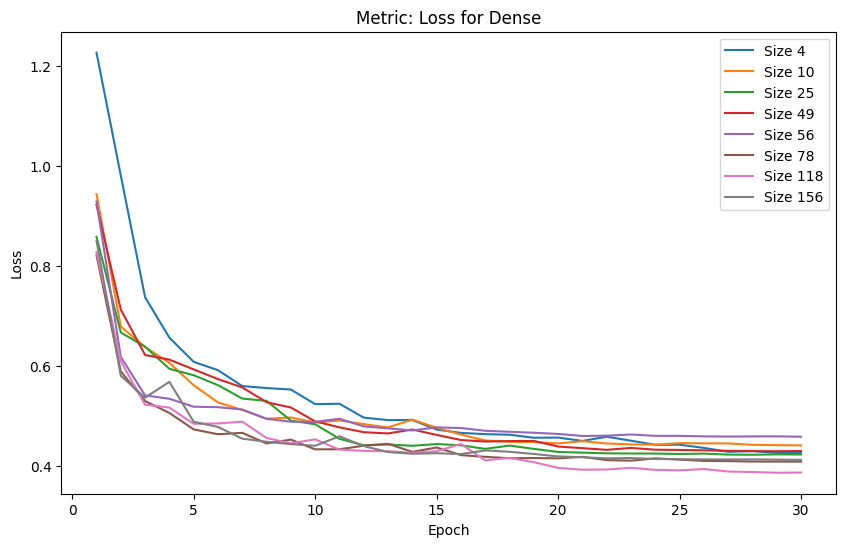

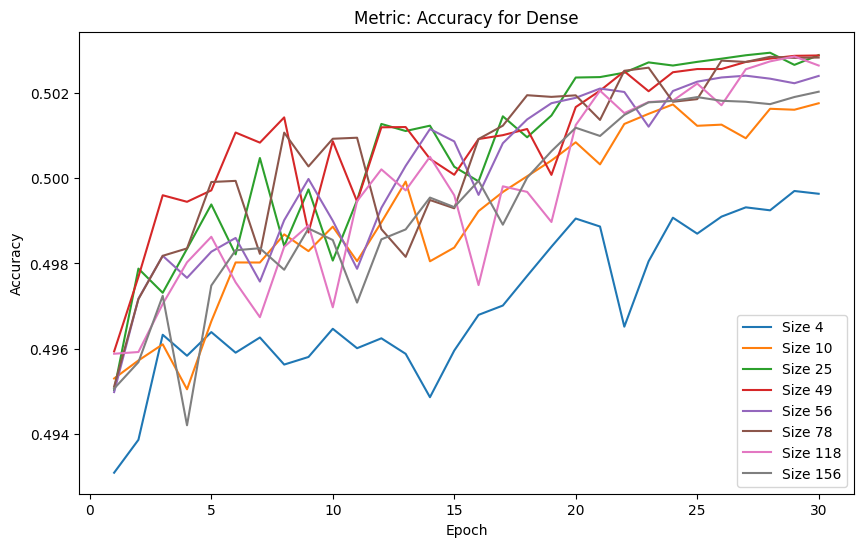

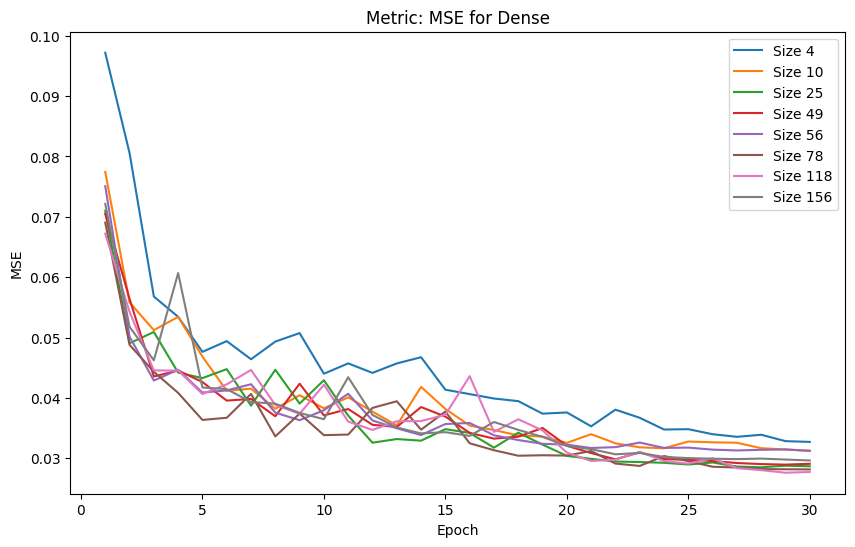

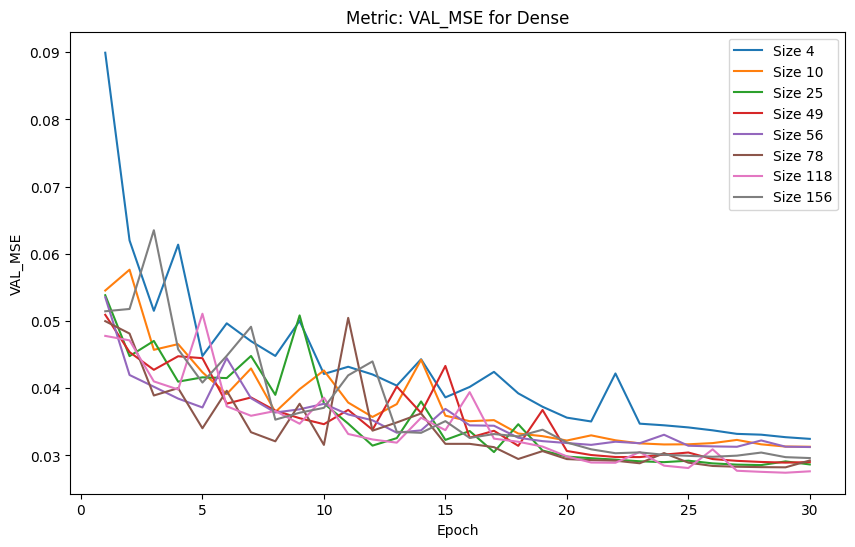

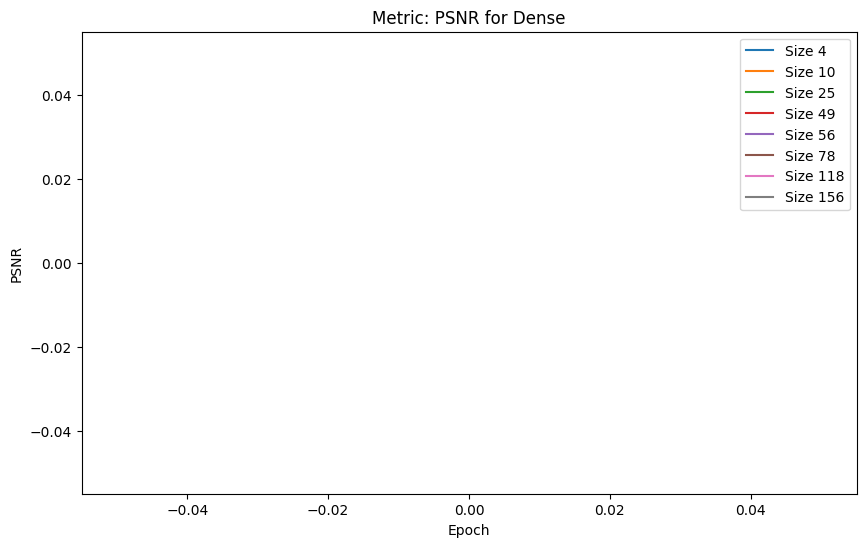

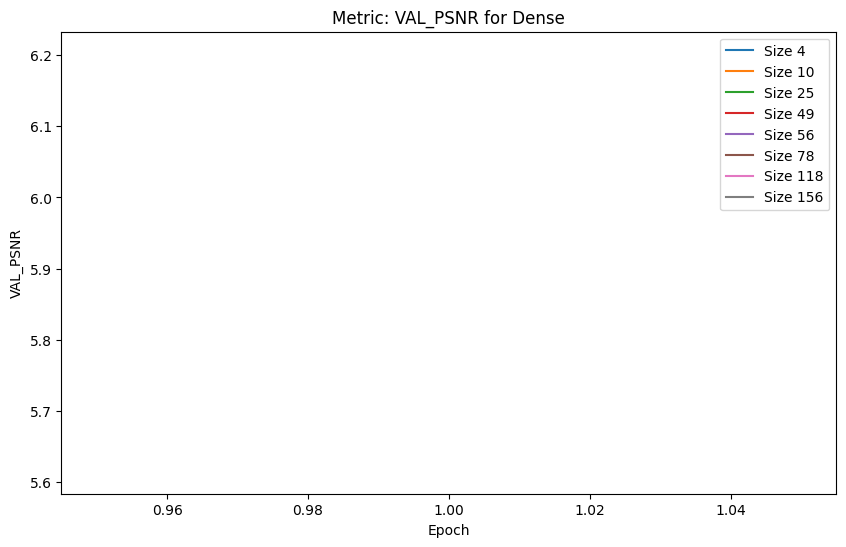

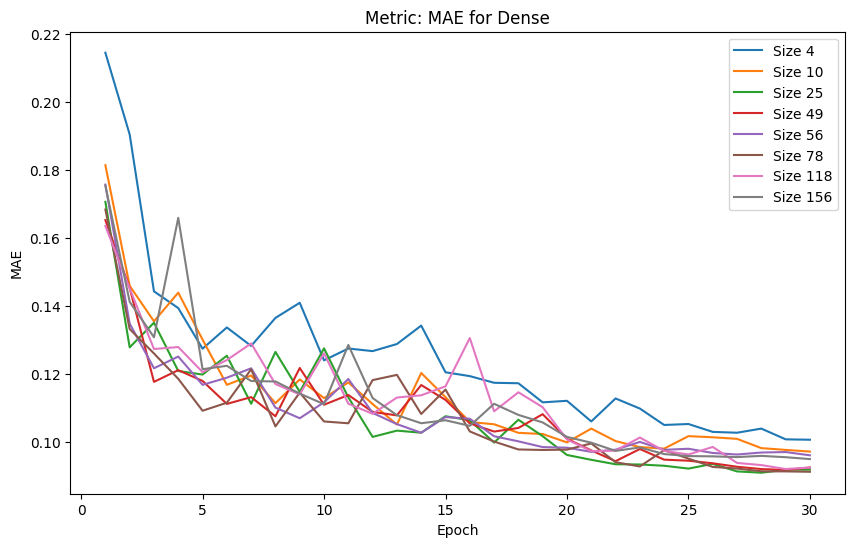

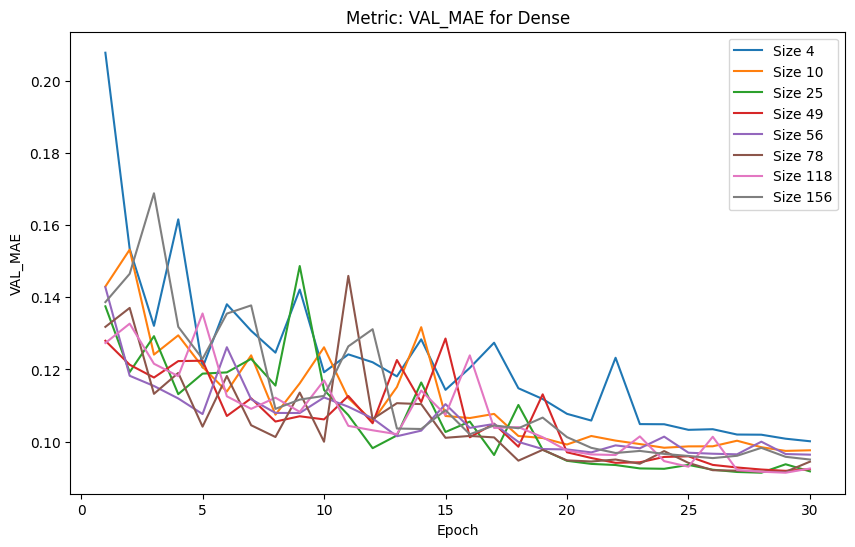

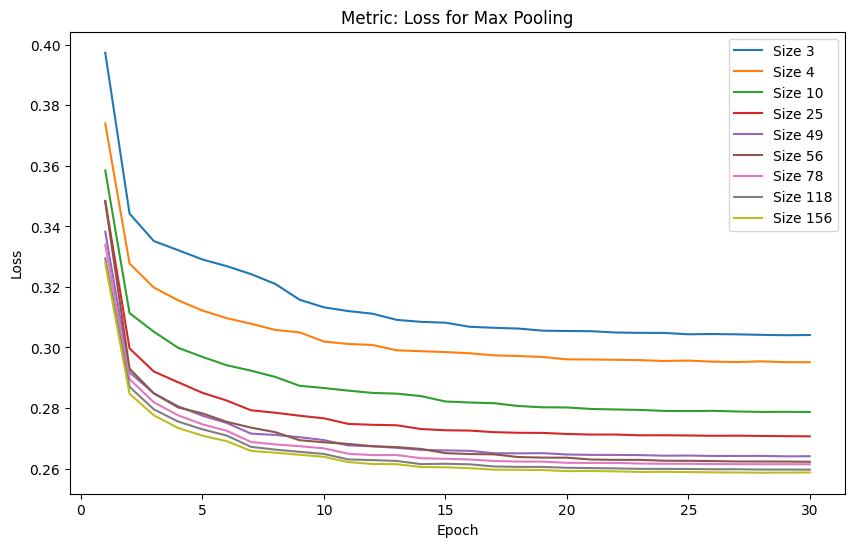

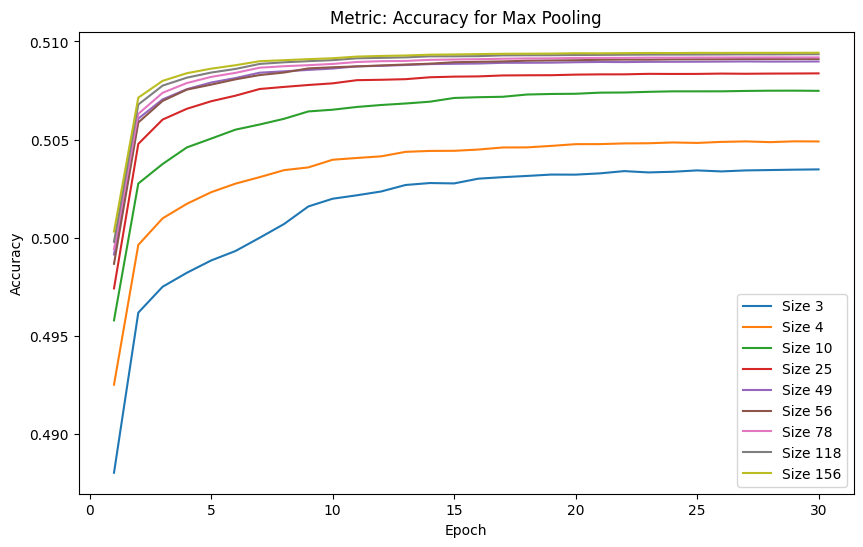

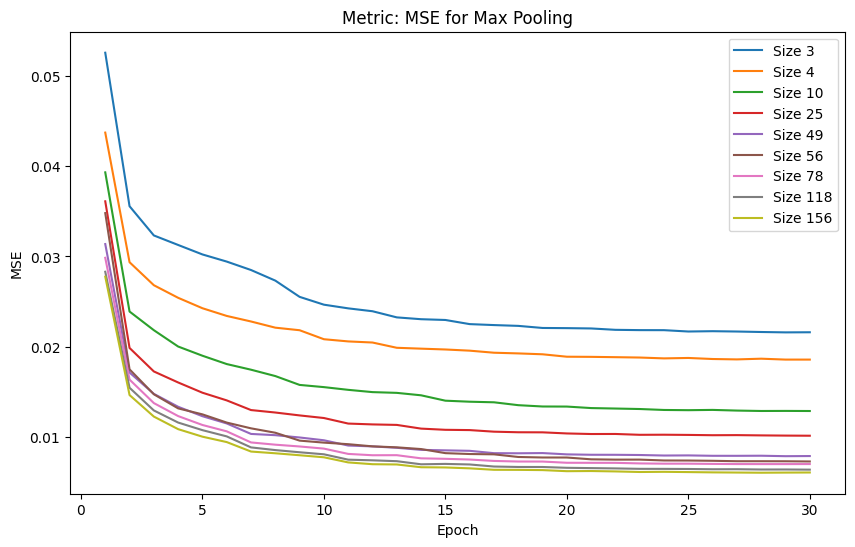

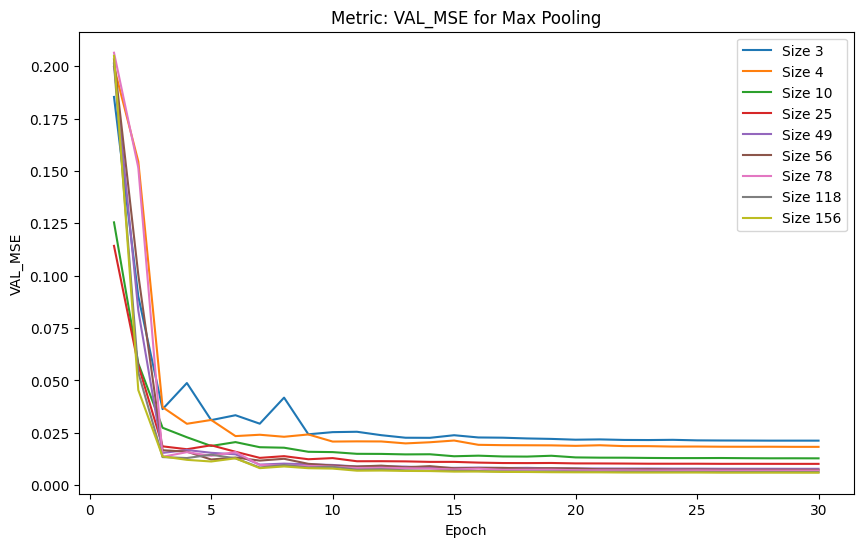

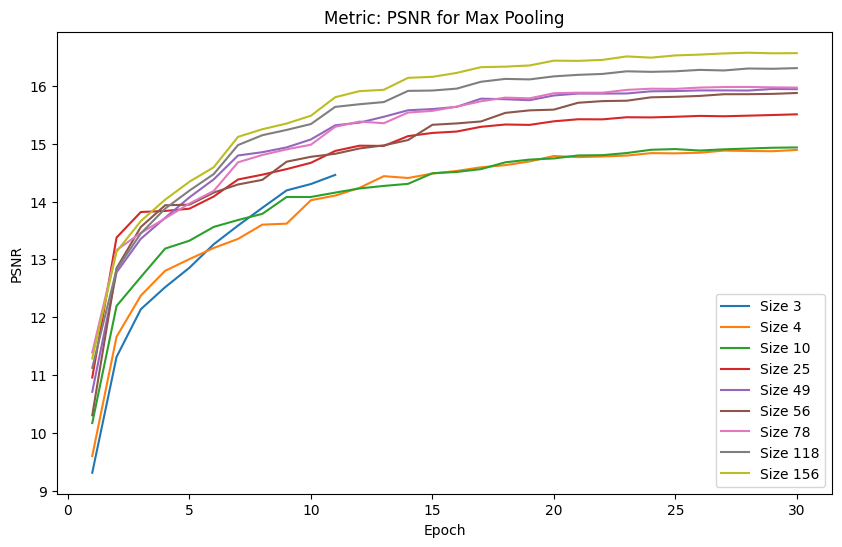

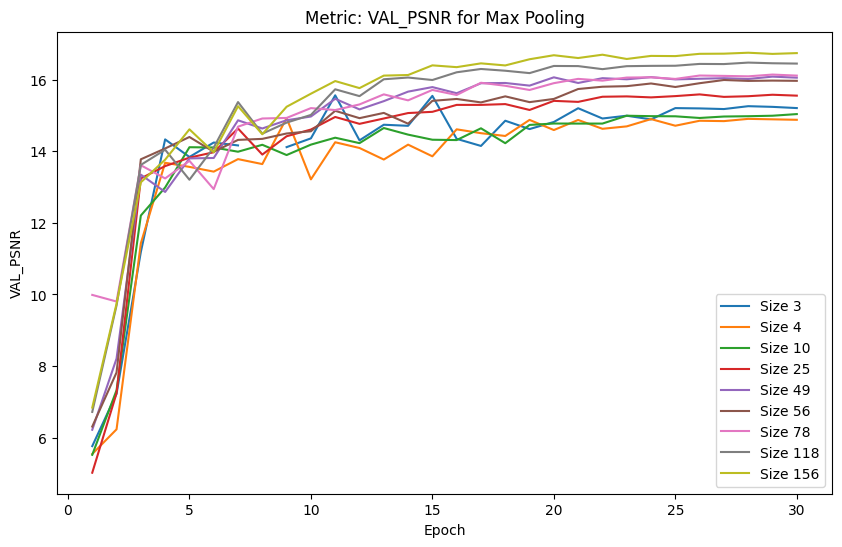

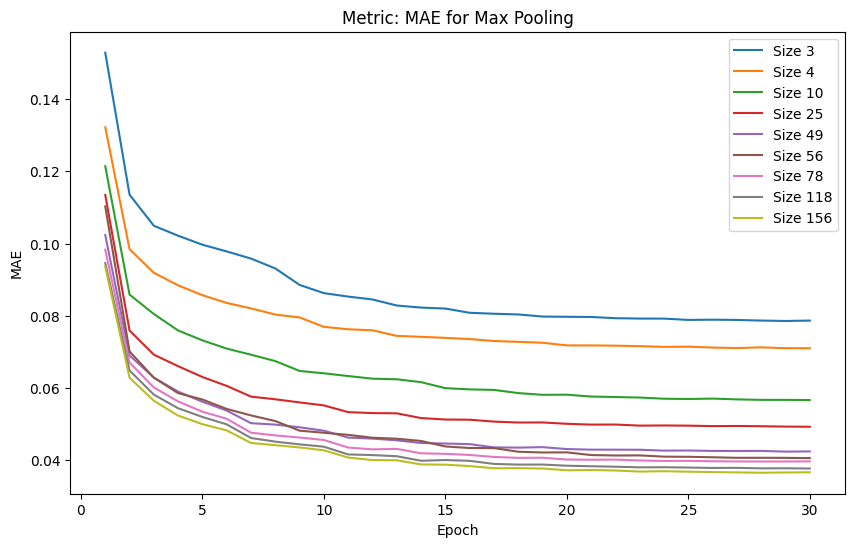

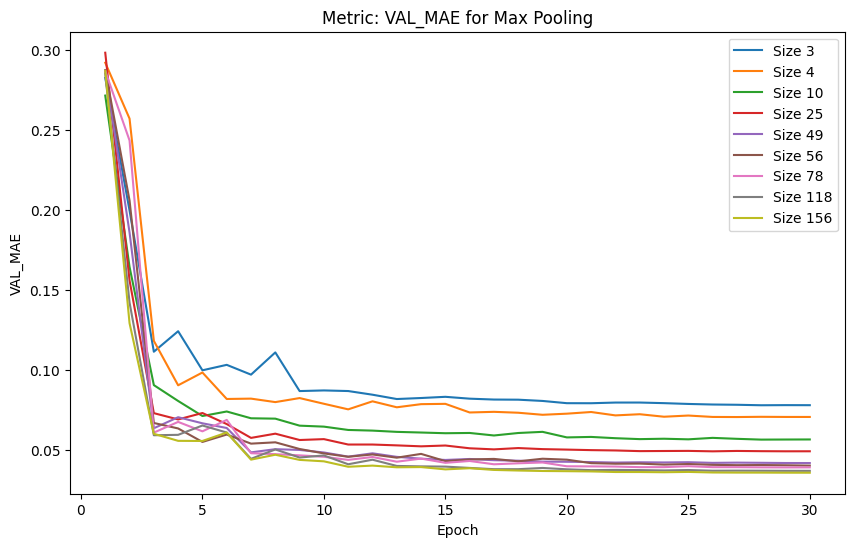

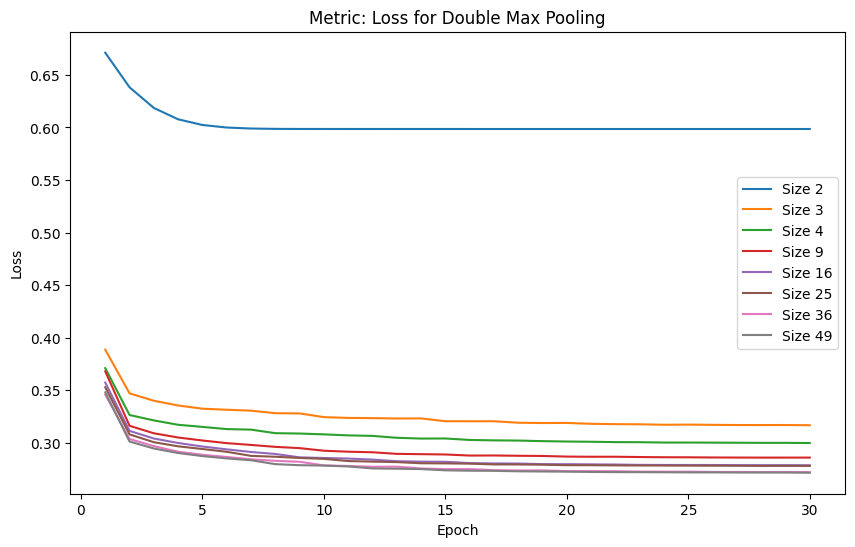

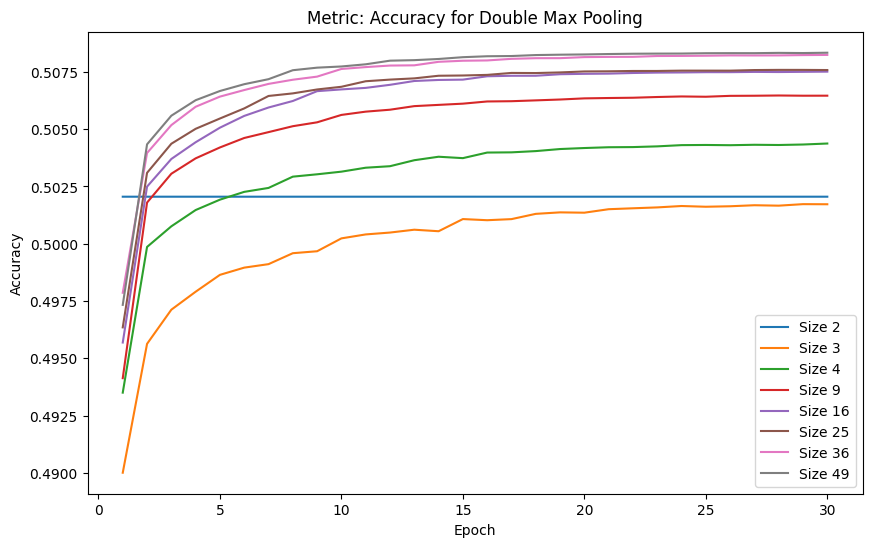

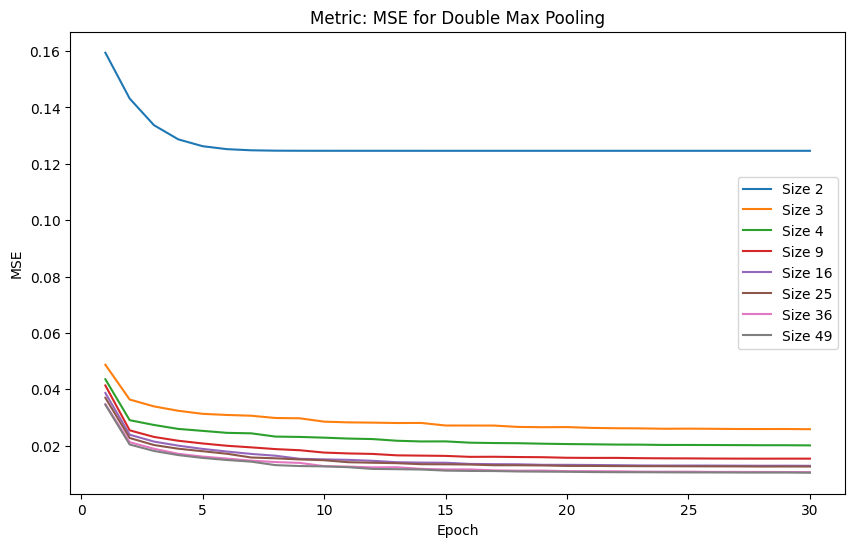

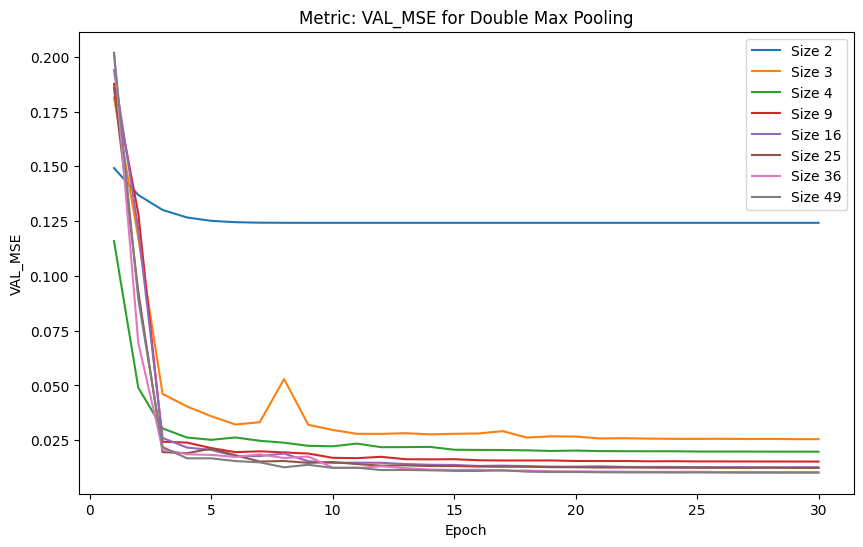

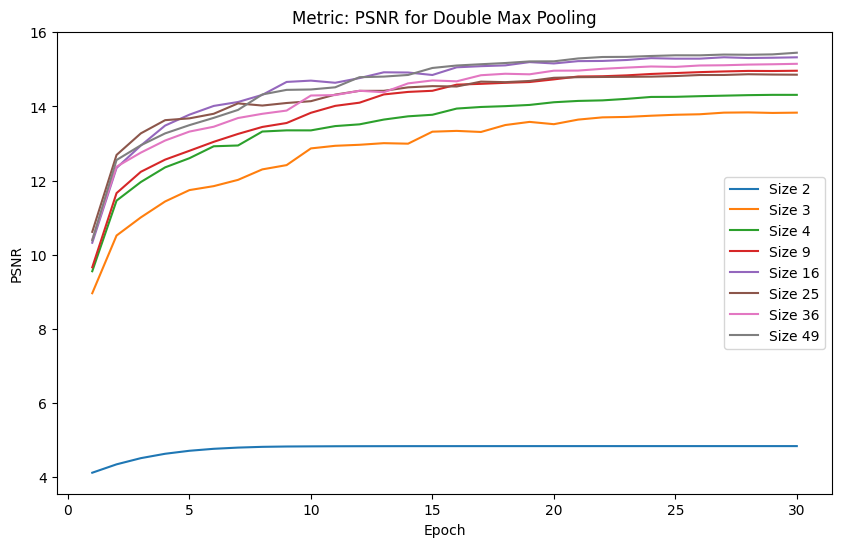

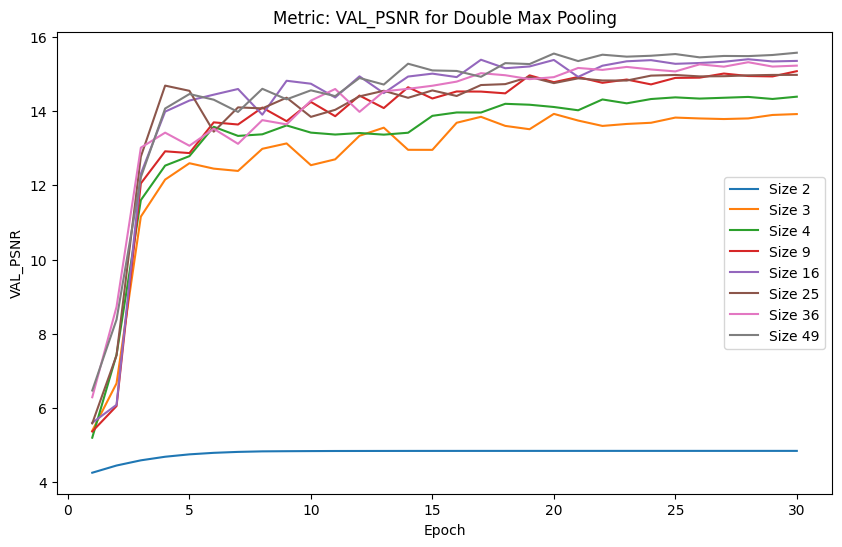

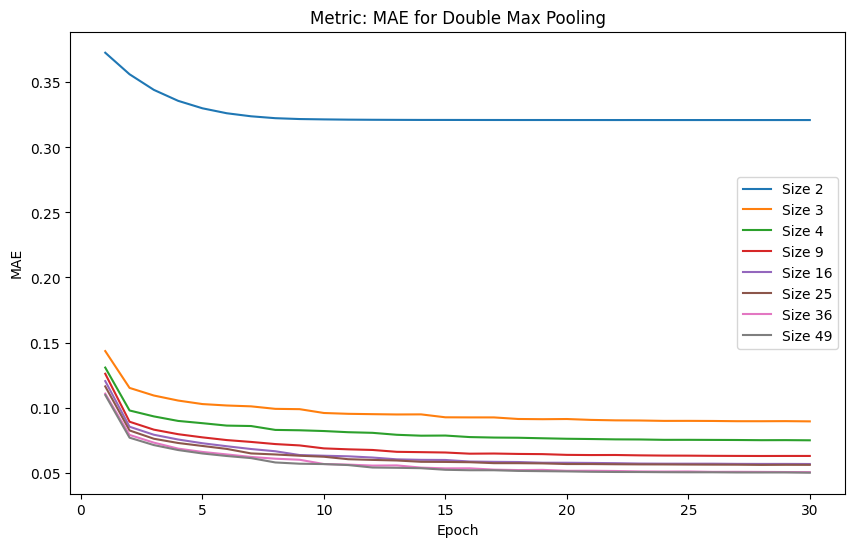

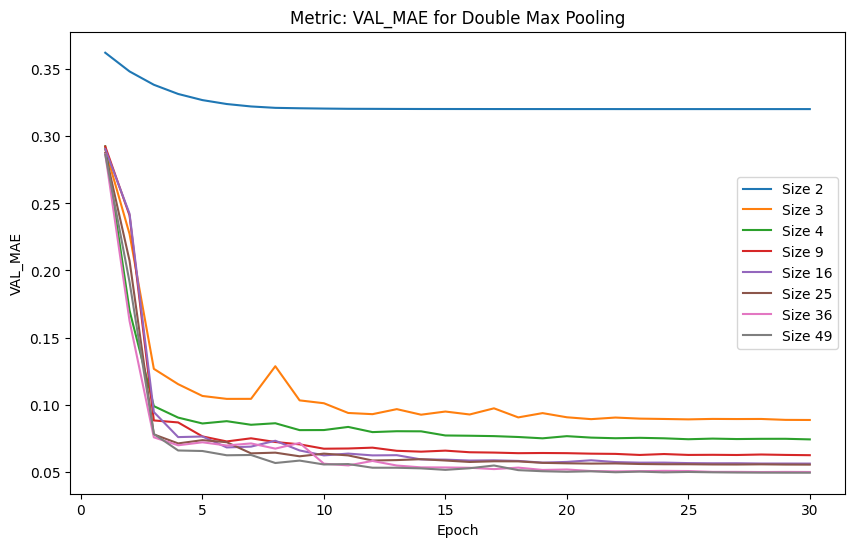

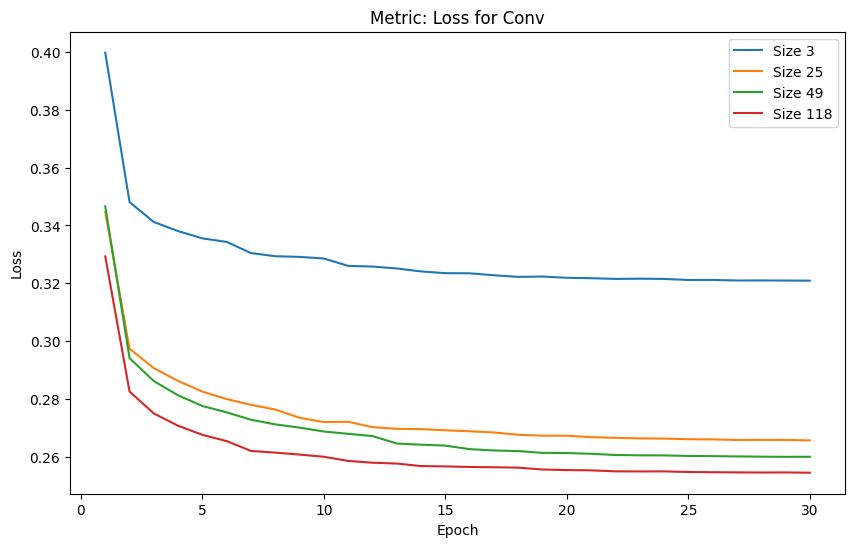

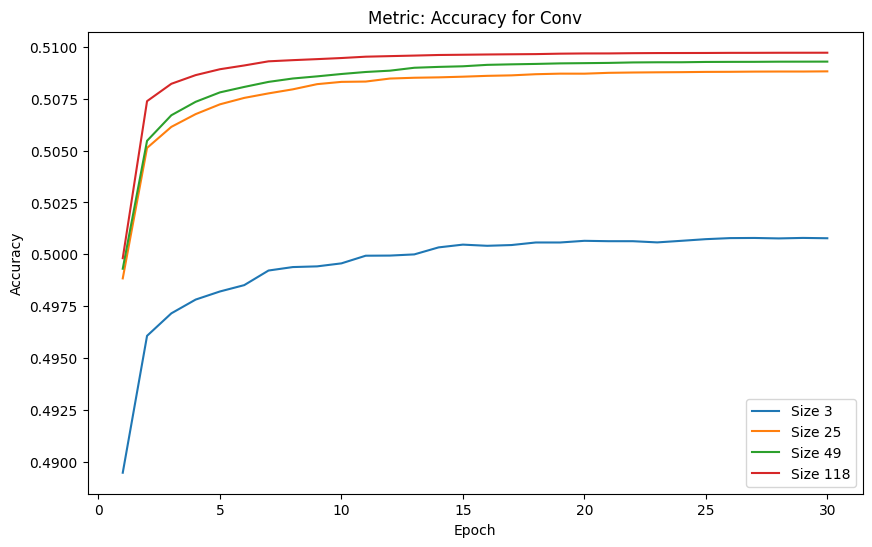

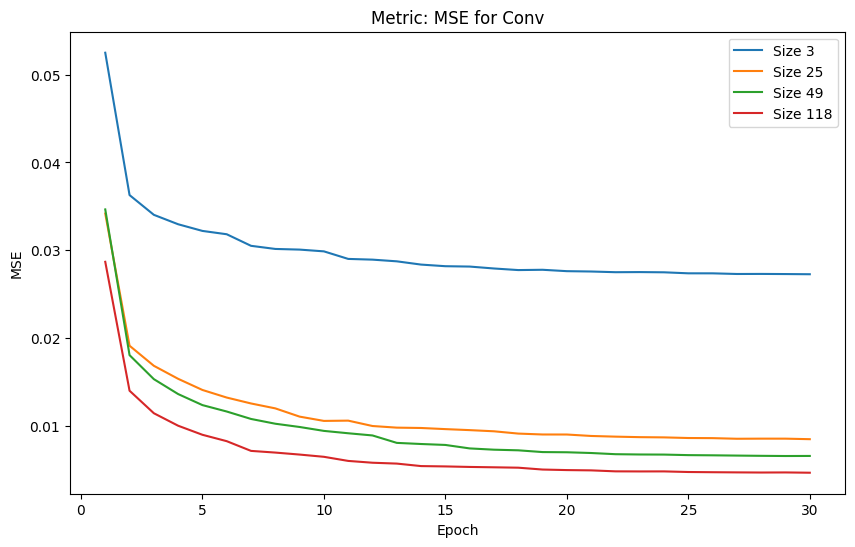

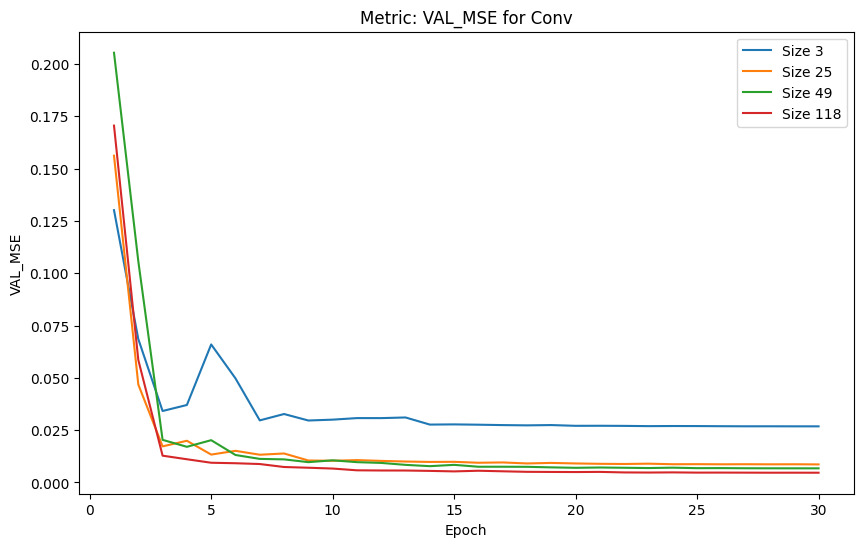

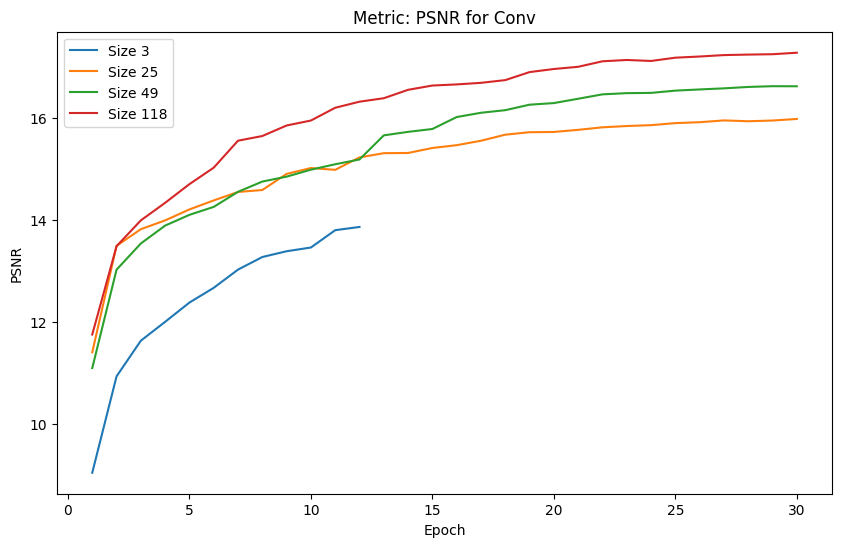

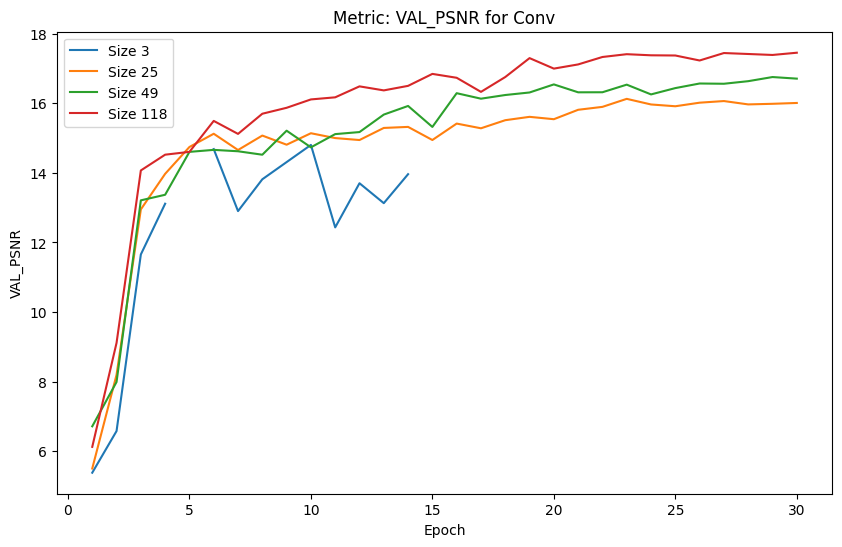

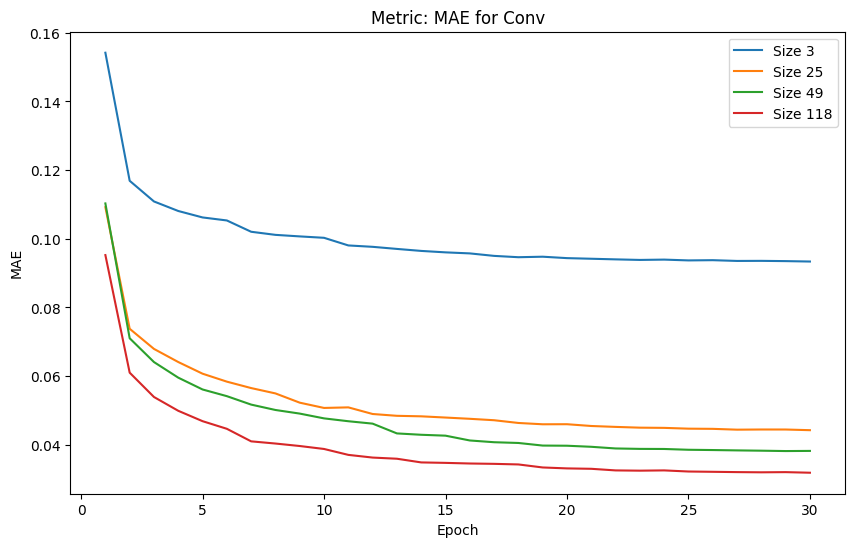

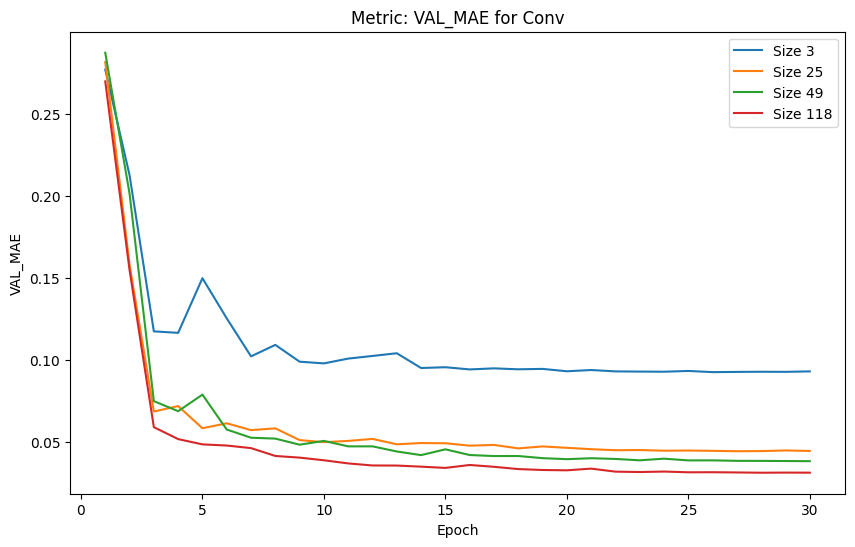

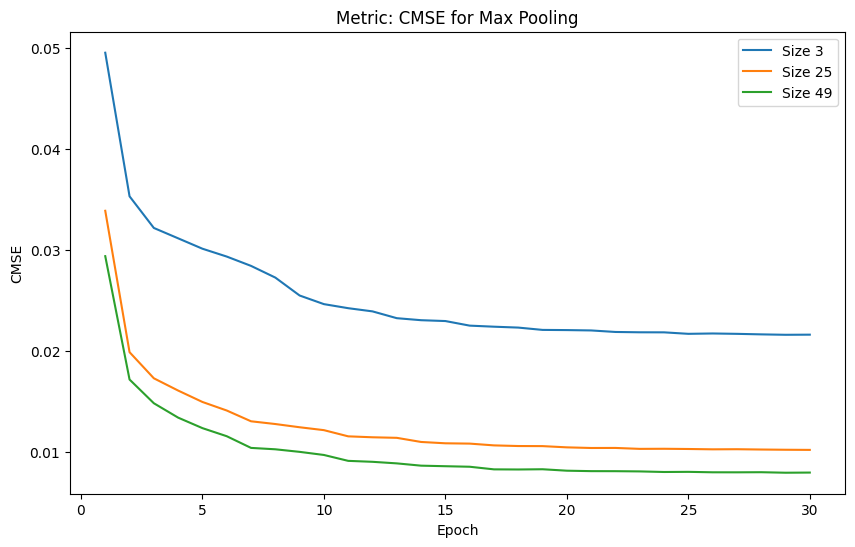

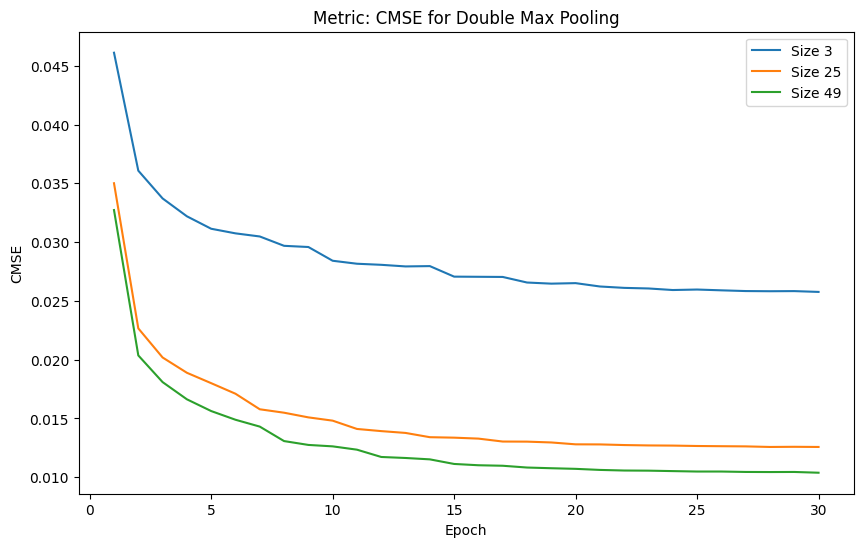

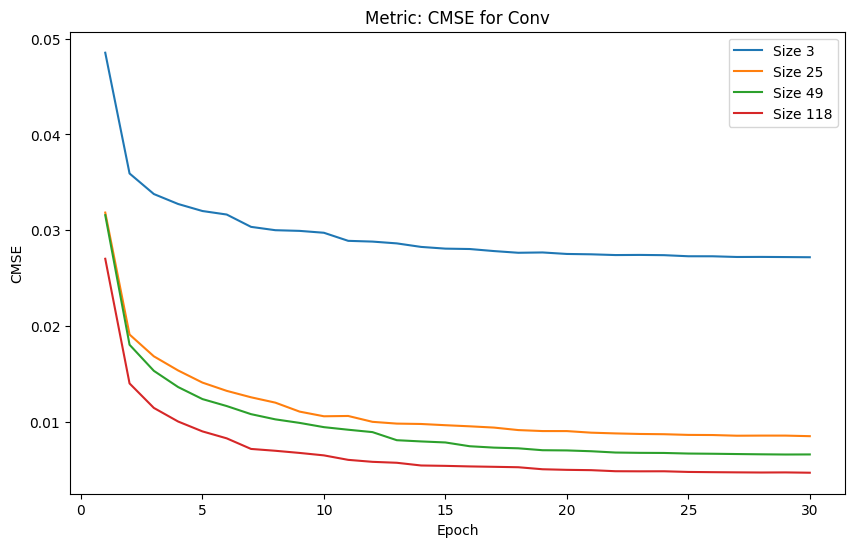

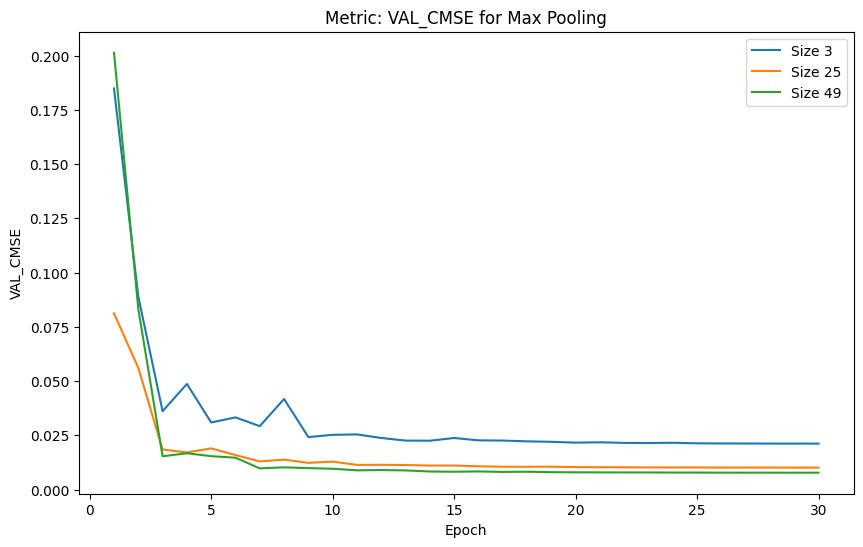

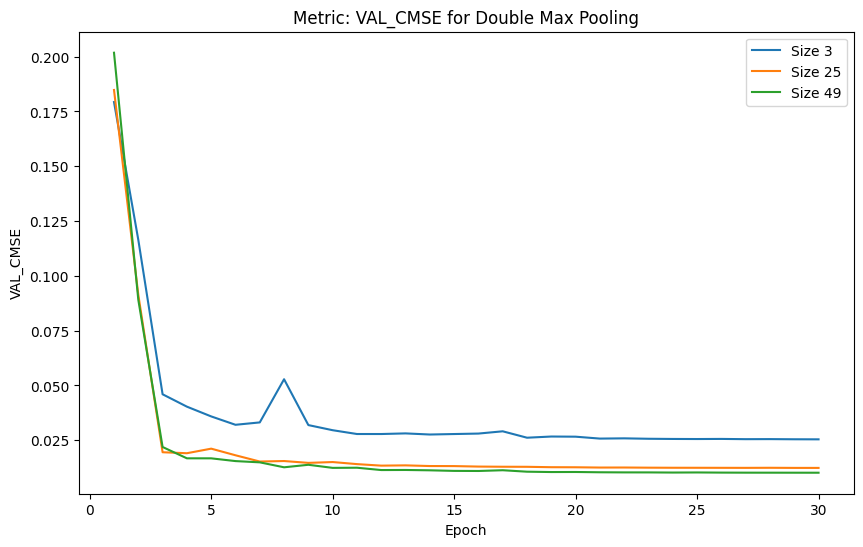

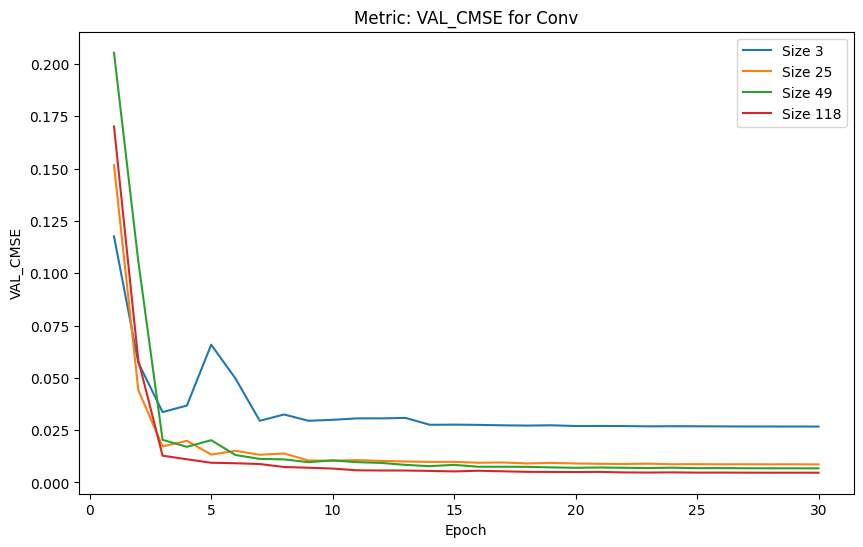

In [139]:
# Rysowanie wykresów dla wszystkich modeli

for name, history in histories.items():
    for metric in metric_name:
        plot_metric_for_objects(name, history, metric, sorted(history.keys(), key=int))

#Rysowanie wykresów CMSE i VAL_CMSE dla wszystkich modeli

plot_metric_for_objects('Max Pooling', max_pooling_histories, "CMSE", ['3', '25', '49'])
plot_metric_for_objects('Double Max Pooling', double_max_pooling_histories, "CMSE", ['3', '25' ,'49'])
plot_metric_for_objects('Conv', conv_histories, "CMSE", ['3', '25', '49', '118'])
plot_metric_for_objects('Max Pooling', max_pooling_histories, "VAL_CMSE", ['3', '25', '49'])
plot_metric_for_objects('Double Max Pooling', double_max_pooling_histories, "VAL_CMSE", ['3', '25' , '49'])
plot_metric_for_objects('Conv', conv_histories, "VAL_CMSE", ['3', '25' , '49', '118'])

In [140]:
# Rysowanie wykresów metryk w zależności od wartości parametru cut_size

def plot_metric_from_size(all_histories, metric_name):
    # Tworzenie wykresu
    fig, ax = plt.subplots(figsize=(10, 6))
    # Sortowanie kluczy

    x_mp =  sorted( (int(i) for i in all_histories["Max Pooling"].keys()), key=int)
    x_dmp =  sorted( (int(i) for i in all_histories["Double Max Pooling"].keys()), key=int)
    x_d =  sorted( (int(i) for i in all_histories["Dense"].keys()), key=int)
    x_c = sorted( (int(i) for i in all_histories["Conv"].keys()), key=int)
    y_mp, y_dmp, y_d, y_c = [], [], [], []

    # Pobieranie danych z historii

    for x in x_mp:
        y_mp.append( all_histories["Max Pooling"][str(x)][metric_name][DATA_SIZE-1] )

    for x in x_dmp:
        y_dmp.append( all_histories["Double Max Pooling"][str(x)][metric_name][DATA_SIZE-1] )

    for x in x_d:
        y_d.append( all_histories["Dense"][str(x)][metric_name][DATA_SIZE-1] )

    for x in x_c:
        y_c.append( all_histories["Conv"][str(x)][metric_name][DATA_SIZE-1] )

    # Rysowanie punktów i ich łączenie

    for i in range(len(x_mp)):
        ax.scatter(x_mp[i], y_mp[i], color='r')
    ax.plot(x_mp, y_mp, linestyle='dashed', color='r', label="MaxPooling2D")

    for i in range(len(x_dmp)):
        ax.scatter(x_dmp[i], y_dmp[i], color='g')
    ax.plot(x_dmp, y_dmp, linestyle='dashed', color='g', label="Double_MaxPooling2D")

    for i in range(len(x_d)):
        ax.scatter(x_d[i], y_d[i], color='b')
    ax.plot(x_d, y_d, linestyle='dashed', color='b', label="Dense")

    for i in range(len(x_c)):
        ax.scatter(x_c[i], y_c[i], color='y')
    ax.plot(x_c, y_c, linestyle='dashed', color='y', label="Conv")

    # Dodanie legendy, tytułu i etykiet osi
    ax.legend()
    ax.set_xlabel('Cut size')
    ax.set_ylabel(metric_name)
    ax.set_title(f'Metric: {metric_name} for different cut sizes')

    # Wyświetlanie wykresu
    plt.show()


In [143]:
# Rysowanie wykresów CMSE w zależności od wartości parametru cut_size

def plot_cmse_from_size(all_histories, metric_name):
    # Tworzenie wykresu
    fig, ax = plt.subplots(figsize=(10, 6))

    x_mp =  ['3', '25', '49']
    x_dmp =  ['3', '25', '49']
    x_c = ['3', '25', '49', '118']
    y_mp, y_dmp, y_c = [], [], []

    # Pobieranie danych z historii

    for x in x_mp:
        y_mp.append( all_histories["Max Pooling"][str(x)][metric_name][DATA_SIZE-1] )

    for x in x_dmp:
        y_dmp.append( all_histories["Double Max Pooling"][str(x)][metric_name][DATA_SIZE-1] )

    for x in x_c:
        y_c.append( all_histories["Conv"][str(x)][metric_name][DATA_SIZE-1] )

    # Rysowanie punktów i ich łączenie

    for i in range(len(x_mp)):
        ax.scatter(x_mp[i], y_mp[i], color='r')
    ax.plot(x_mp, y_mp, linestyle='dashed', color='r', label="MaxPooling2D")

    for i in range(len(x_dmp)):
        ax.scatter(x_dmp[i], y_dmp[i], color='g')
    ax.plot(x_dmp, y_dmp, linestyle='dashed', color='g', label="Double_MaxPooling2D")

    for i in range(len(x_c)):
        ax.scatter(x_c[i], y_c[i], color='y')
    ax.plot(x_c, y_c, linestyle='dashed', color='y', label="Conv")

    # Dodanie legendy, tytułu i etykiet osi
    ax.legend()
    ax.set_xlabel('Cut size')
    ax.set_ylabel(metric_name)
    ax.set_title(f'Metric: {metric_name} for different cut sizes')

    # Wyświetlanie wykresu
    plt.show()


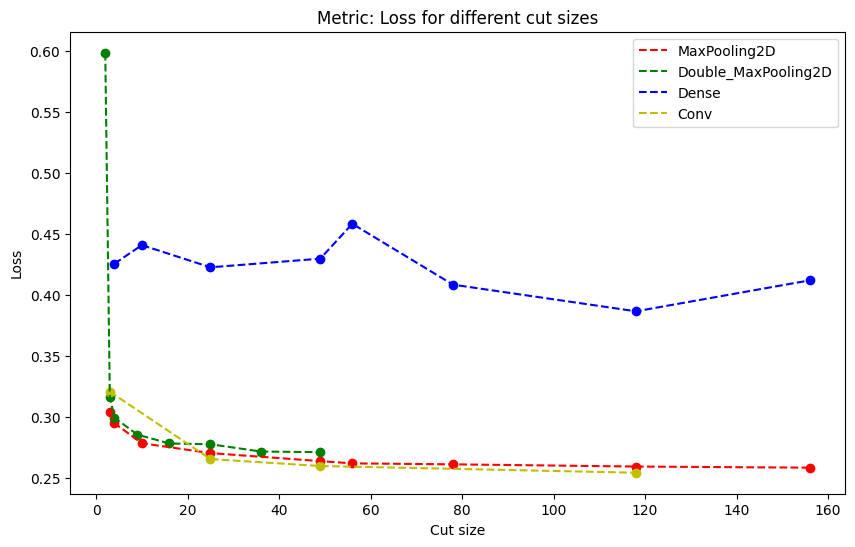

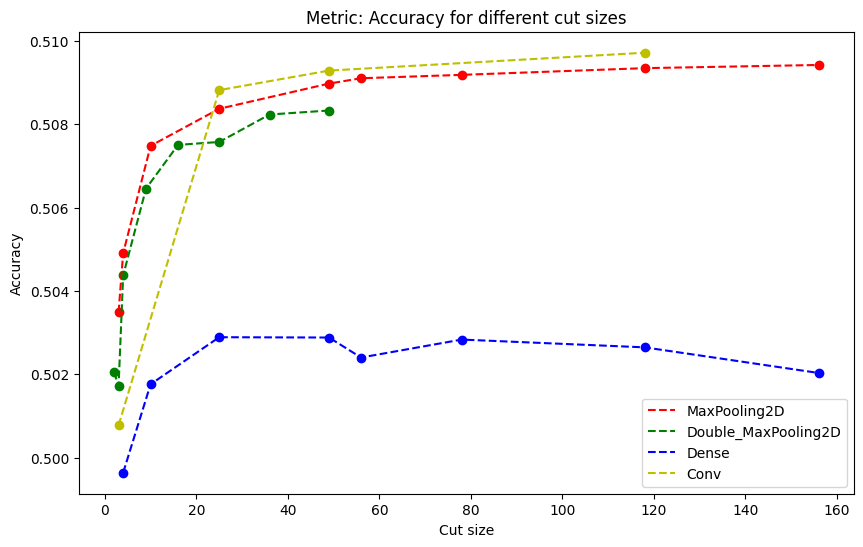

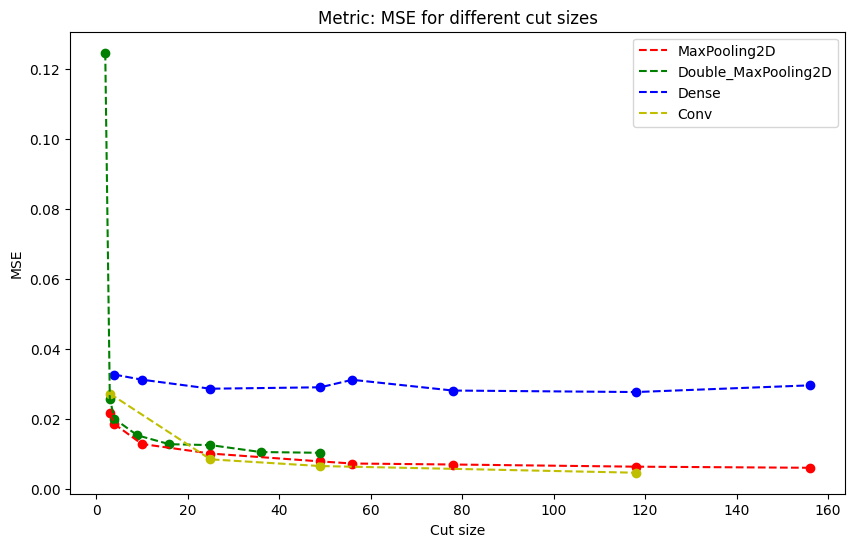

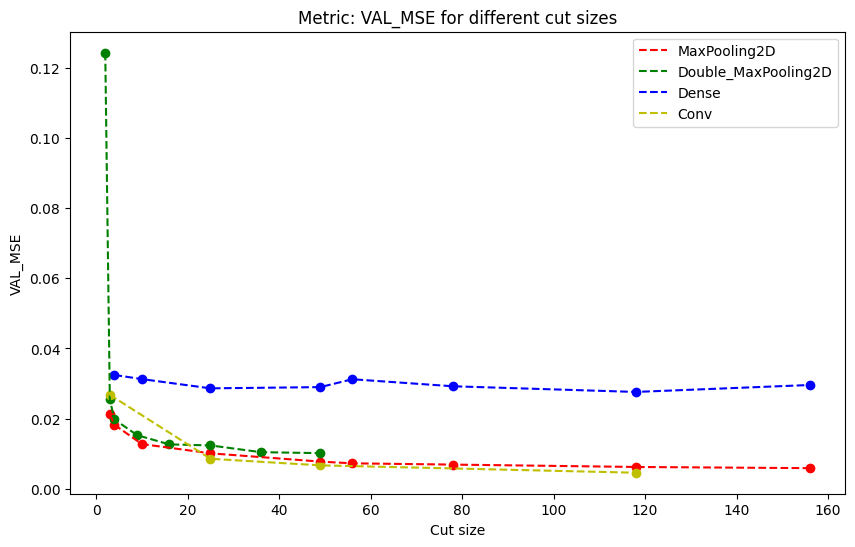

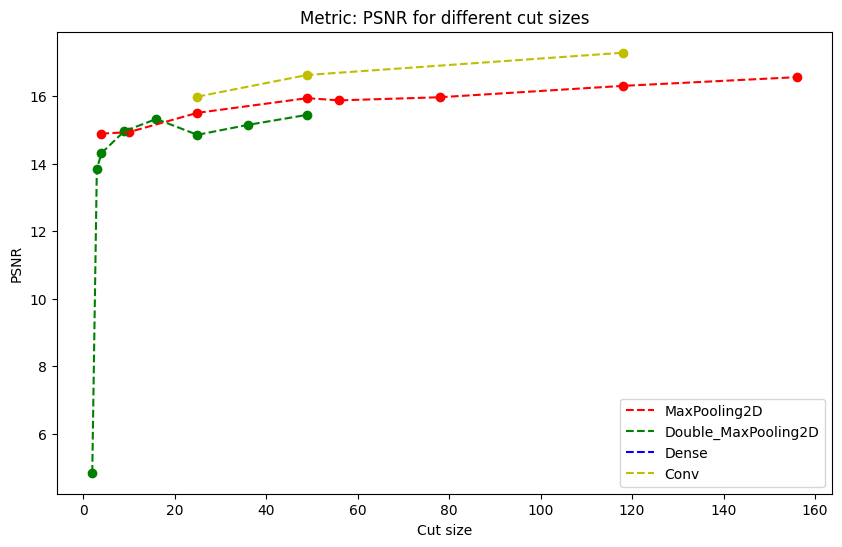

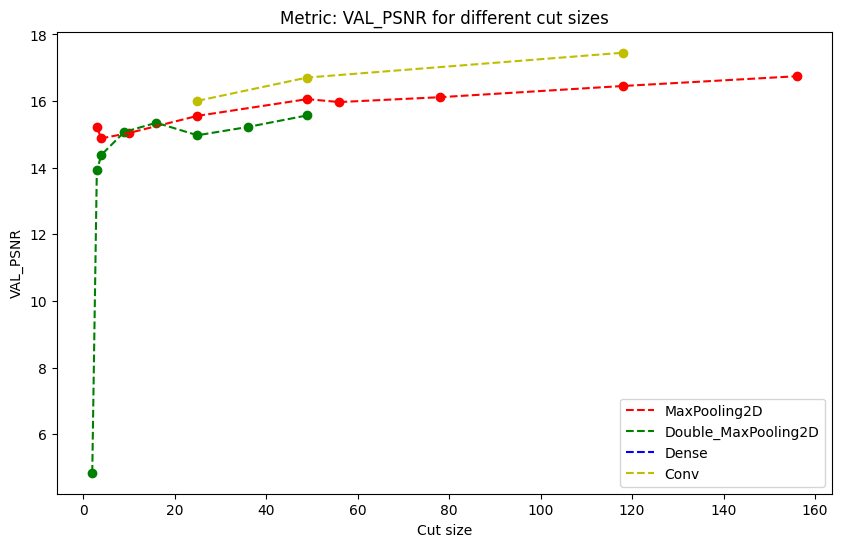

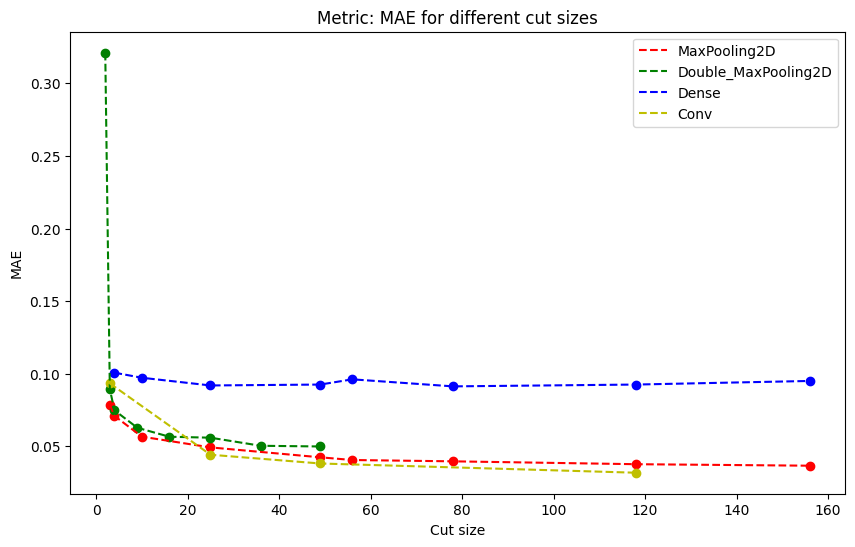

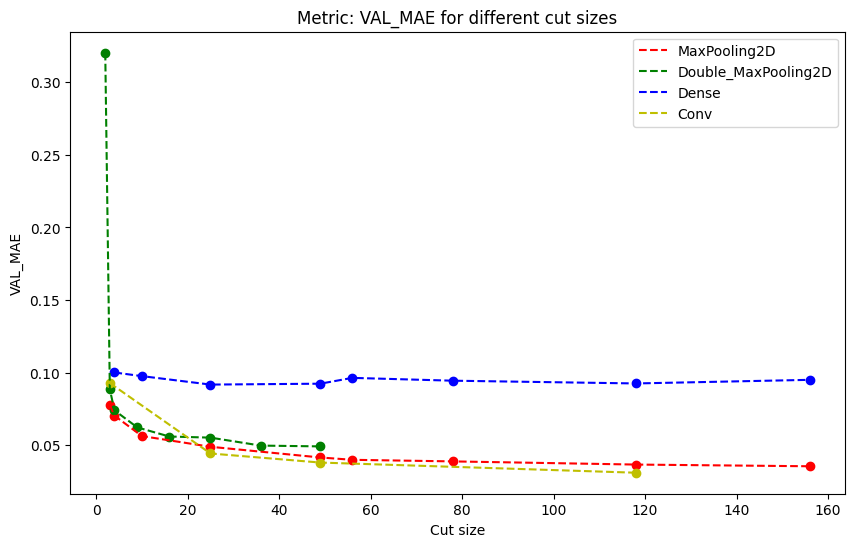

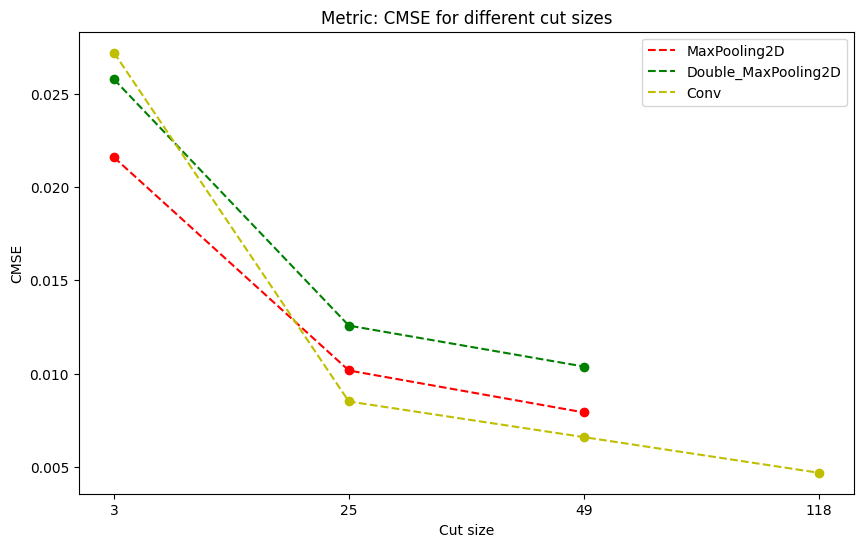

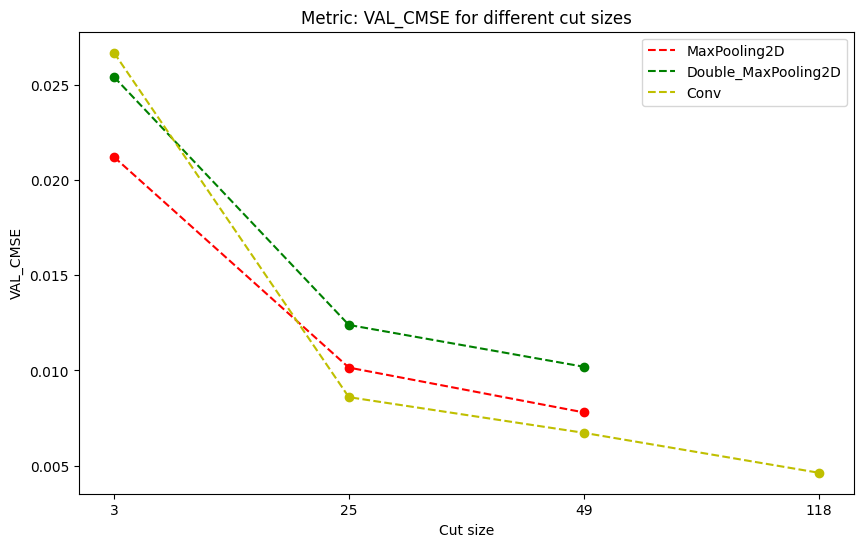

In [144]:
for metric in metric_name:
    plot_metric_from_size(histories, metric)

plot_cmse_from_size(histories, 'CMSE')
plot_cmse_from_size(histories, 'VAL_CMSE')